# CS170A -- HW#2: Eigenfaces -- Matlab

Your name:  Alfred Lucero

Your UID:  604251044

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

## Problem 1:  Eigenfaces

Chapter 11 of the Course Reader is on Eigenfaces.
For this assignment we have included the face files
for this chapter in the directory <tt>old_faces</tt>.
It includes some Matlab scripts and a database of 177 face images,
each a grayscale <tt>.bmp</tt> bitmap file of size $64 \times 64$ pixels.
The face images have been pre-processed so that the background
and hair are removed and the faces have similar lighting conditions.

The Course Reader explains how to
reshape each face image into a $1 \times 64^2 \, = \, 1 \times 4096$ row vector, and collect them into a matrix.
The principal components of the matrix then define the main dimensions of variance in the faces.
The program <tt>more_efficient_eigenfaces.m</tt> shows how to do this.
These principal components are called <i>eigenfaces</i>.

### This Assignment uses a new Face Dataset -- with Normal and Smiling Faces

The goal of this problem is to apply the same ideas to a new set of 200 faces in the directory <tt>new_faces</tt>.
The subdirectory <tt>new_faces/faces</tt> has 200 faces that have been normalized, cropped, and equalized.
The subdirectory <tt>new_faces/smiling_faces</tt> has 200 images of the same people, but they are smiling.
Each of these images is a grayscale <tt>.jpg</tt> file with size $193 \times 162$.

### 1a:  The Average Face

Modify the program <tt>more_efficient_eigenfaces.m</tt> (available in this directory)
to use the <tt>new_faces</tt> images instead of the <tt>old_faces</tt> images.
Also, modify it to use the Matlab function <tt>imresize</tt> to downsample
each of the new faces by a factor of 3, so it is $64 \times 54$ (instead of $193 \times 162$).
Then: <i>pad</i> both sides of the image with <tt>zeros(64,5)</tt>
so the result is a $64 \times 64$ image.

Then: create a function that
takes as input a string array of filenames of face images, an integer $k$,
and an integer sample size $s$ ---
and yields the average face and the first $k$ singular values and eigenfaces as output values
for a sample of size $s$.

Apply your function to
both the <tt>new_faces/faces</tt>
and the <tt>new_faces/smiling_faces</tt>
directories,
and plot the absolute value of the difference between your average face and (your downsampled version of)
the average face provided in the directory.

(The <tt>imagesc</tt> function can display images with automatic rescaling of numeric values.)

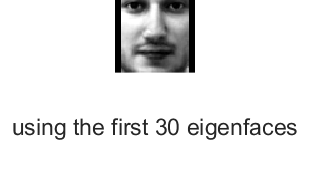

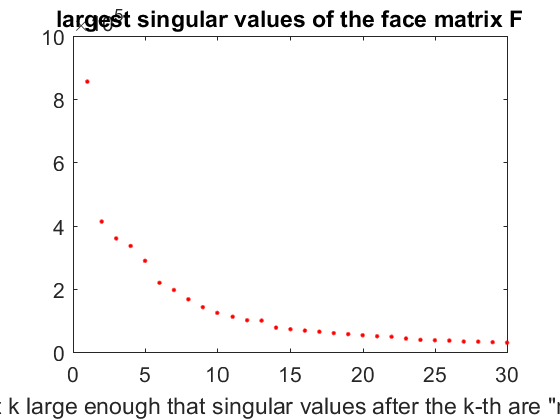

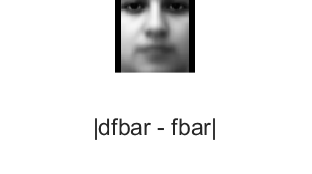

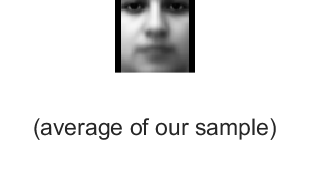

reconstruction_error =

   1.0692e+03


In [1]:
% load normal and smiling file structs (assume the file organization is the same as the code given)
normal_files = dir('./new_faces/faces/*.jpg'); % 201 x 1 struct array including the normal face file metadataa
smiling_files = dir('./new_faces/smiling_faces/*.jpg'); % 201 x 1 struct array including the smiling face file metadata

% convert normal and smiling face file structs into string arrays of filenames
normal_filenames = strings(201,1);
smiling_filenames = strings(201,1);
for i = 1:201
   normal_filenames(i, 1) = strcat(normal_files(i).folder, '\', normal_files(i).name);
   smiling_filenames(i, 1) = strcat(smiling_files(i).folder, '\', smiling_files(i).name);
end

% change into old_faces directory with the more_efficient_eigenfaces.m (beware after running once the current directory changes and need to cd .. to go back to original state before rerunning this block again)
cd old_faces;


%  image showing the difference between your average normal face and the one provided
% more_efficient_eigenfaces is a function that takes in a string array of filenames, k number of singular values, and s sample size
more_efficient_eigenfaces(normal_filenames, 30, 200)





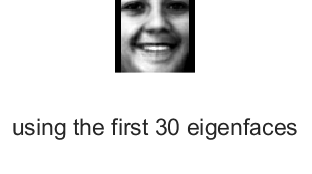

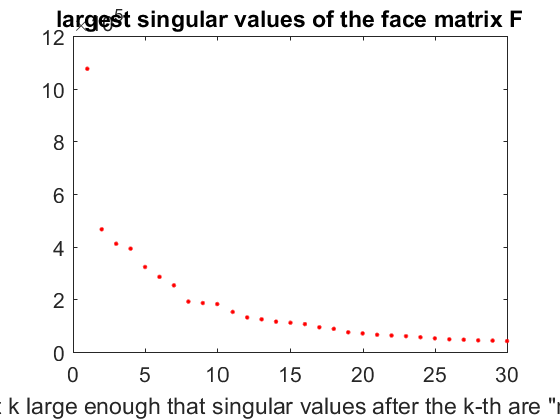

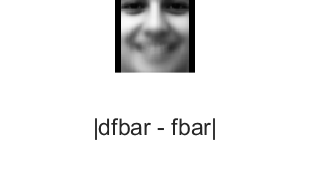

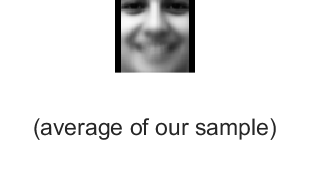

reconstruction_error =

   1.1156e+03


In [2]:
%  image showing the difference between your average smiling face and the one provided
more_efficient_eigenfaces(smiling_filenames, 30, 200)



### 1b: Smiling makes a Difference

If your mean normal face is $\overline{\mathbf{f}}_0$, and your mean smiling face is $\overline{\mathbf{f}}_1$,
render (using <tt>imagesc</tt>)
the difference $\overline{\mathbf{f}}_0-\overline{\mathbf{f}}_1$
(the average difference between normal faces and smiling faces).


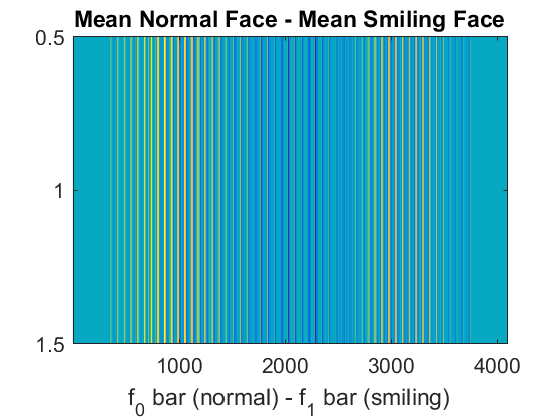

In [3]:
% Define 64x64, 150 sample images used
row = 64;
col = 64;

% Helper functions
image_vector = @(Bitmap) double(reshape(Bitmap,1, row*col));

vector_image = @(Vec) reshape( uint8( min(max(Vec,0),255) ), row, col);

vector_render = @(Vec) imshow(vector_image(Vec));


samplesize = 200;

% compute the mean normal face f_zero_bar and mean smiling face f_one_bar
F_Normal = zeros(samplesize, row*col);
F_Smiling = zeros(samplesize, row*col);
for i = 1:samplesize
    Image_Normal_File = char(normal_filenames(i));
    Face_Normal_Resized = imresize(imread(Image_Normal_File), 1/3);
    Face_Normal_Matrix = zeros(64, 64);
    Face_Normal_Matrix(:, 6:59) = Face_Normal_Resized(1:64, :);
    
    Image_Smiling_File = char(smiling_filenames(i));
    Face_Smiling_Resized = imresize(imread(Image_Smiling_File), 1/3);
    Face_Smiling_Matrix = zeros(64, 64);
    Face_Smiling_Matrix(:, 6:59) = Face_Smiling_Resized(1:64, :);
    
    F_Normal(i,:) = image_vector(Face_Normal_Matrix);
    F_Smiling(i,:) = image_vector(Face_Smiling_Matrix);
end

f_zero_bar = sum(F_Normal,1)/samplesize; % average of all rows in F_Normal
f_one_bar = sum(F_Smiling,1)/samplesize; % average of all rows in F_Smiling


%  image showing the difference between the average normal face and average smiling face
figure
imagesc(f_zero_bar - f_one_bar)
title('Mean Normal Face - Mean Smiling Face')
xlabel('f_0 bar (normal) - f_1 bar (smiling)')

### 1c: Scree Plots and $k$-Approximation

Using your downsampled images,
perform PCA on each set of faces (normal and smiling).

For each image (normal or smiling), construct its $64^2 \times 1$ vector $\mathbf{f}$.
Then, subtract the average face
($\overline{\mathbf{f}}_0$ or $\overline{\mathbf{f}}_1$)
and project the remainder on the first $k = 60$ eigenfaces.
For example, with a smiling face,
the projection of $\mathbf{f}$ on the $j$-th smiling eigenface $\mathbf{e}_j$ is
$$
c_j ~=~ {(\mathbf{f} \, - \, \overline{\mathbf{f}}_1)}' \, {\mathbf{e}_j}  ~~~~~~~~~~ (j = 1,\dots,k).
$$

For each set of faces (normal or smiling),
make one large scree plot for the set, showing all sequences of the first $k$ coefficients
for each image overplotted (e.g. with <tt>hold on</tt>).

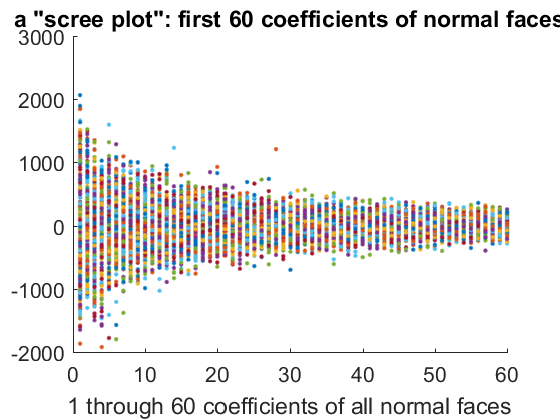

In [4]:
% Perform more_efficient_pca on normal face, k = 60
k = 60;
[U_normal, singular_values_normal] = more_efficient_pca(F_Normal, k);

%  (overlaid) scree plots for normal faces
figure
hold on;
for i = 1:samplesize
   f = F_Normal(i,:)'; % originally 1 x 64^2 must transpose to be 64^2 x 1
   fbar = f_zero_bar';
   cj = (f-fbar)' * U_normal; % cj = (f - fbar)'ej
   cj = cj'; % tranpose back to get column vector 60 x 1 per each;
   plot((1:60),cj(:,1),'.')
end
title('a "scree plot": first 60 coefficients of normal faces')
xlabel('1 through 60 coefficients of all normal faces')
hold off;



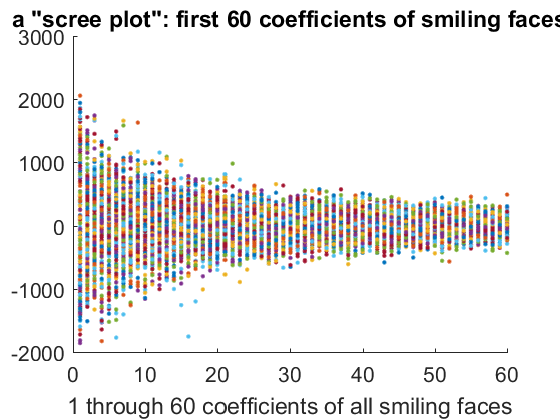

In [5]:
% Perform more_efficient_pca on smiling face, k = 60
[U_smiling, singular_values_smiling] = more_efficient_pca(F_Smiling, 60);
%  (overlaid) scree plots for smiling faces
figure
hold on;
for i = 1:samplesize
   f = F_Smiling(i,:)'; % originally 1 x 64^2 must transpose to be 64^2 x 1
   fbar = f_one_bar';
   cj = (f-fbar)' * U_smiling; % cj = (f - fbar)'ej
   cj = cj'; % tranpose back to get column vector 60 x 1 per each;
   plot((1:60),cj(:,1), '.')
end
title('a "scree plot": first 60 coefficients of smiling faces')
xlabel('1 through 60 coefficients of all smiling faces')
hold off;

### 1d:  Unusualness of a Face

Let us say the <i>unusualness</i> of a face is the $L_2$ norm
of its eigenface-coefficient vector (using the first $k=60$ eigenfaces).

Determine, for each set (normal or smiling), the most unusual face.

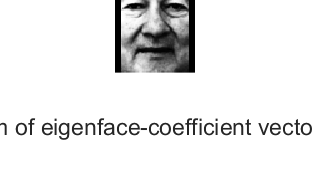

most_unusual_normal_L2 =

   3.5140e+03


In [6]:
%  the most unusual normal face - find the max L2 norm of the cj and return that face
most_unusual_normal_face_matrix = F_Normal(1,:);
most_unusual_normal_L2 = norm((most_unusual_normal_face_matrix' - f_zero_bar')'* U_normal);
for i = 1:samplesize
    f = F_Normal(i,:)'; % originally 1 x 64^2 must transpose to be 64^2 x 1
    fbar = f_zero_bar';
    cj = (f-fbar)' * U_normal; % cj = (f - fbar)'ej
    cj = cj'; % tranpose back to get column vector 60 x 1 per each;
    norm_cj = norm(cj);
    if (norm_cj > most_unusual_normal_L2)
        most_unusual_normal_L2 = norm_cj;
        most_unusual_normal_face_matrix = F_Normal(i,:);
    end
end

most_unusual_normal_L2
figure
vector_render(most_unusual_normal_face_matrix)
title('Most unusual normal face out of 200 images')
xlabel('maximum_L2 norm of eigenface-coefficient vectors of 200 images')



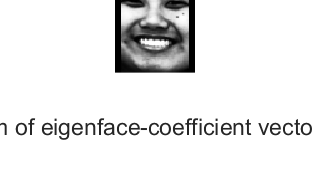

most_unusual_smiling_L2 =

   4.5076e+03


In [7]:
%  the most unusual smiling face - find the max L2 norm of the cj and return that face
most_unusual_smiling_face_matrix = F_Smiling(1,:);
most_unusual_smiling_L2 = norm((most_unusual_smiling_face_matrix' - f_one_bar')'* U_smiling);

for i = 1:samplesize
   f = F_Smiling(i,:)'; % originally 1 x 64^2 must transpose to be 64^2 x 1
   fbar = f_one_bar';
   cj = (f-fbar)' * U_smiling; % cj = (f - fbar)'ej
   cj = cj'; % tranpose back to get column vector 60 x 1 per each;
   norm_cj = norm(cj);
   if (norm_cj > most_unusual_smiling_L2)
       most_unusual_smiling_L2 = norm_cj;
       most_unusual_smiling_face_matrix = F_Smiling(i,:);
   end
end

most_unusual_smiling_L2
figure
vector_render(most_unusual_smiling_face_matrix)
title('Most unusual smiling face out of 200 images')
xlabel('maximum_L2 norm of eigenface-coefficient vectors of 200 images')


## Problem 2: Face Classifiers

Develop two different face classifiers using the eigenfaces you've computed;
each should be a function that, given a face image $\mathbf{f}$ as input,
yields the output value 1 if $\mathbf{f}$ is smiling, and 0 otherwise.
(NOTE: or vice-versa; we just need the function to be a classifier)

Specifically, implement the following 2 classifiers that take an input image $\mathbf{f}$:
<ul><li>  {Classifier X}:   yield 1 if the normal face unusualness of $\mathbf{f}$ is greater than smiling face unusualness of $\mathbf{f}$, else 0.
<br/><br/>
</li><li>  {Classifier Y}:   yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||^2$, else 0.
<br/><br/>
<!--
</li><li>  {Classifier Z}:   if $C_0$ is the covariance matrix for normal faces, and $C_1$ is the covariance matrix for smiling faces,
yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||_{C_0}^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||_{C_1}^2$, else 0.
<br/>
(Here: $||{\mathbf{x}}||_C^2 \;=\; {\mathbf{x}}' \; C^{-} \; \mathbf{x}$ is the kernel norm defined by the pseudo-inverse of the covariance matrix $C$.)
-->
</li></ul>

### 2a:  Unusual Face Classification

Using each of these classifiers, determine the classification it yields
for the two most unusual images you found in the previous question.

In [8]:
% yields 1 if the normal face unusualness of f is greater than smiling face unusualness of f, else 0
x_classifier = @(f) norm((f' - f_zero_bar')'* U_normal) > norm((f' - f_one_bar')' * U_smiling);

% yields 1 if norm(f-f_zero_bar)^2 >= norm(f - f_one_bar)^2, else 0
y_classifier = @(f) norm(f-f_zero_bar)^2 >= norm(f - f_one_bar)^2;

%  X, Y classifications of the most unusual normal face - most_unusual_normal_face_matrix
% both return 1, signifying that the most unusual normal face out of first 150 images is identified as smiling
x_normal_classified = x_classifier(most_unusual_normal_face_matrix)
y_normal_classified = y_classifier(most_unusual_normal_face_matrix)

x_normal_classified =

  logical

   1


y_normal_classified =

  logical

   1


In [9]:
%  X, Y classifications of the most unusual smiling face - most_unusual_smiling_face_matrix
% returns 0 in X classifier meaning the most unusual smiling face out of first 150 images is identified as normal 
x_smiling_classified = x_classifier(most_unusual_smiling_face_matrix)
% returns 1 in X classifier meaning the most unusual smiling face out of first 150 images is identified as smiling 
y_smiling_classified = y_classifier(most_unusual_smiling_face_matrix)

x_smiling_classified =

  logical

   0


y_smiling_classified =

  logical

   1


### 2b:  Splitting into Training and Test sets

Write a function <tt>[Sublist1 Sublist2] = randsplit(List)</tt> that takes an array <tt>List</tt> of length <tt>n</tt>
and splits it randomly into two sublists of size <tt>floor(n/2)</tt> and <tt>ceil(n/2)</tt>.
(Hint: <tt>randperm</tt>)

Use <tt>randsplit</tt> to split each of the 200-face sets
into a <u>training subset</u> and <u>testing subset</u> of equal size.

For both sets of faces (100 normal faces and 100 smiling faces),
compute the average normal and smiling faces
$\overline{\mathbf{f}}_0$ and $\overline{\mathbf{f}}_1$
<u>for the training set</u>.

In [10]:
% randsplit function that returns two random n/2 sublists
randlist = @(List) deal(List(randperm(floor(size(List,1)/2)), :), List(randperm(ceil(size(List,1)/2)), :));

% split each of the 200-face sets into a training subset and testing subset of equal size
[normal_training normal_testing] = randlist(F_Normal);
[smiling_training smiling_testing] = randlist(F_Smiling);

% The average normal face (for the training set)
average_normal_training_face = sum(normal_training, 1) / 200


average_normal_training_face =

  Columns 1 through 16

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 17 through 32

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 33 through 48

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 49 through 64

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 65 through 80

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 81 through 96

         

In [11]:
% The average smiling face (for the training set)
average_smiling_training_face = sum(smiling_training, 1) / 200

average_smiling_training_face =

  Columns 1 through 16

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 17 through 32

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 33 through 48

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 49 through 64

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 65 through 80

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0

  Columns 81 through 96

        

### 2c:  Classifier Error Rate

For each of the Classifiers (X, Y), using the average faces you just computed: 
<ul><li>
classify each of the 200 faces $\mathbf{f}$ in the testing set, and count classification errors.
</li><li>
compute the <i>error rate</i> (percentage of errors in test face classifications) for the Classifier.
</li></ul>

Then rank the classifiers by their error rate.

#### For normal faces (using the test set):

In [12]:
% set the f_zero_bar (normal) and f_one_bar (smiling) according to newly computed average faces of training sets
f_zero_bar = average_normal_training_face;
f_one_bar = average_smiling_training_face;

% yields 1 if the normal face unusualness of f is greater than smiling face unusualness of f, else 0
x_classifier = @(f) norm((f' - f_zero_bar')'* U_normal) > norm((f' - f_one_bar')' * U_smiling);

% yields 1 if norm(f-f_zero_bar)^2 >= norm(f - f_one_bar)^2, else 0
y_classifier = @(f) norm(f-f_zero_bar)^2 >= norm(f - f_one_bar)^2;


% Use normal testing set to sum up errors in classifying normal faces (if it returns 1 for smiling that is an error)
X_normal_error_count = 0;
Y_normal_error_count = 0;
for i = 1:100
    % If X_Classifier returns 1 for smiling, increment X normal error count
    if x_classifier(normal_testing(i,:)) == 1
        X_normal_error_count = X_normal_error_count + 1;
    end
    
    % If Y_Classifier returns 1 for smiling, increment Y normal error count
    if y_classifier(normal_testing(i,:)) == 1
        Y_normal_error_count = Y_normal_error_count + 1;
    end
end

% X, Y error rates
X_normal_error_rate = X_normal_error_count / 100
Y_normal_error_rate = Y_normal_error_count / 100




X_normal_error_rate =

    0.0700


Y_normal_error_rate =

    0.0200


In [13]:
%  which of the classifiers has lowest error rate for normal faces in the test set?
% The Y Classifier has the lowest error rate for the 100 normal faces in the test set: 2% vs. X classifier's 7%
X_normal_error_rate
Y_normal_error_rate

X_normal_error_rate =

    0.0700


Y_normal_error_rate =

    0.0200


#### For smiling faces (using the test set):

In [14]:
% Use smiling testing set to sum up errors in classifying smiling faces (if it returns 0 for normal that is an error)
X_smiling_error_count = 0;
Y_smiling_error_count = 0;
for i = 1:100
    % If X_Classifier returns 0 for normal, increment X smiling error count
    if x_classifier(smiling_testing(i,:)) == 0
        X_smiling_error_count = X_smiling_error_count + 1;
    end
    
    % If Y_Classifier returns 0 for normal, increment Y smiling error count
    if y_classifier(smiling_testing(i,:)) == 0
        Y_smiling_error_count = Y_smiling_error_count + 1;
    end
end

% X, Y error rates
X_smiling_error_rate = X_smiling_error_count / 100
Y_smiling_error_rate = Y_smiling_error_count / 100

X_smiling_error_rate =

    0.4500


Y_smiling_error_rate =

    0.1900


In [15]:
%  which of the classifiers has lowest error rate for smiling faces in the test set?
% The Y Classifier has the lowest error rate for the 100 smiling faces in the test set: 19% vs. X classifier's 45%
X_smiling_error_rate
Y_smiling_error_rate

X_smiling_error_rate =

    0.4500


Y_smiling_error_rate =

    0.1900


## Problem 3:  Face Compression

In the previous problem you computed the first 60 Eigenface coefficients, and used these to find the most unusual face.

For each $64 \times 64$ image $X$ from your (downsampled) smiling faces, compute the following sequences:
<ul><li> (descendingly sorted absolute values of) the first 60 Eigenface coefficients for $X$
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided FFT of $X$  (in Matlab: <tt>fft2(X)</tt>)
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided DCT of $X$  (in Matlab: <tt>dct2(X)</tt>)
</li><li> the first 60 singular values from the SVD of $X$.
</li></ul>

We get an <i>image compression</i> scheme if we keep only the first $k \leq 60$ coefficients, and discard the rest.

Define
$$
\mbox{$k$-coefficient compression error} ~~=~~
\frac{\mbox{(the sum of absolute values of all coefficients after the first $k$)}}{\mbox{(the sum of absolute values of all coefficients)}} .
$$

Compute the $k$-coefficient compression error for each of the 4 transforms,
$1 \leq k \leq 60$, <u>for the smiling test set</u>.

Rank the 4 transforms above by their average compression error (for $k \leq 60$).

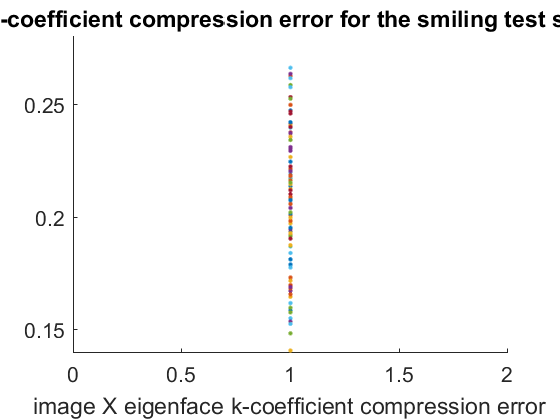

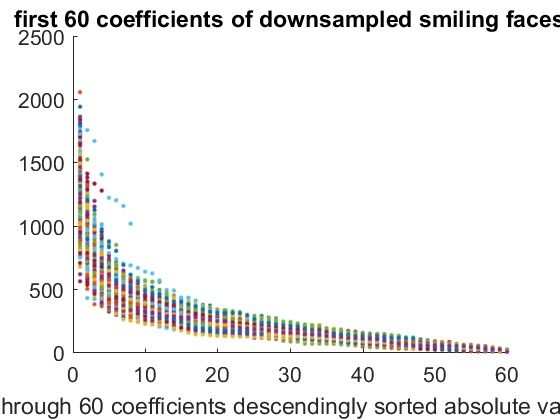

average_eigenface_error =

    0.2054


In [16]:
f_one_bar = sum(F_Smiling,1)/samplesize; % average of all rows in F_Smiling
% Perform more_efficient_pca on smiling face, k = 60
[U_smiling, singular_values_smiling] = more_efficient_pca(F_Smiling, 60);

%  plot the descendingly sorted absolute values of the first 60 eigenface coefficients for each downsampled smiling face X
figure
hold on;
for i = 1:samplesize
   f = F_Smiling(i,:)'; % originally 1 x 64^2 must transpose to be 64^2 x 1
   fbar = f_one_bar';
   cj = (f-fbar)' * U_smiling; % cj = (f - fbar)'ej
   sorted_cj = sort(abs(cj(1,:)), 'descend');
   plot((1:60),sorted_cj(1,:), '.');
end
title('first 60 coefficients of downsampled smiling faces')
xlabel('1 through 60 coefficients descendingly sorted absolute values')
hold off;


%  plot of the Eigenface's k-coefficient compression error for the smiling test set (for k <= 60)
f_one_bar = average_smiling_training_face;
[U_test_all, singular_values_test_all] = more_efficient_pca(smiling_testing, 100);
%[U_test, singular_values_test] = more_efficient_pca(smiling_testing, 60);
total_eigenface_error = 0;
figure
hold on;
for i=1:100
    f = smiling_testing(i, :)';
    fbar = f_one_bar';
    cj_all = (f -fbar)' * U_test_all;
    %cj_k = (f -fbar)' * U_test;
    k_coefficient_compression_error = sum(abs(cj_all(1,61:100)))/sum(abs(cj_all));
    total_eigenface_error = total_eigenface_error + k_coefficient_compression_error;
    plot(k_coefficient_compression_error, '.')
end
title('Eigenface k-coefficient compression error for the smiling test set for k <= 60')
xlabel('image X eigenface k-coefficient compression error')
hold off;

% Compute the average eigenface compression error for k <= 60
average_eigenface_error = total_eigenface_error / 100

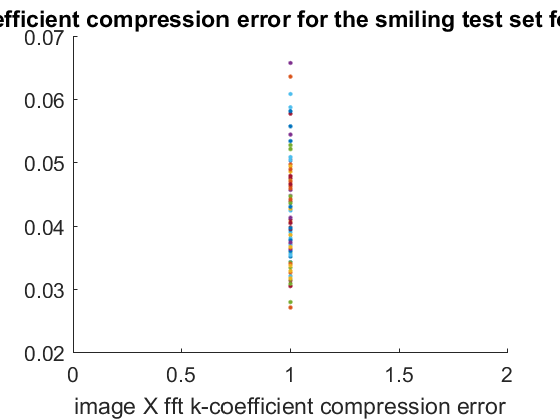

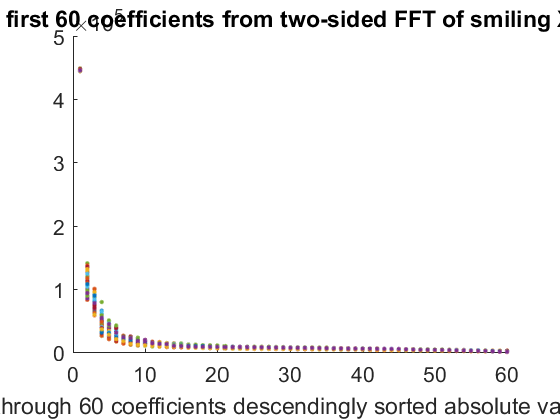

average_fft_error =

    0.0416


In [17]:
%  plot of the descendingly sorted absolute values of the first 60 coefficient values from the two-sided FFT of  X  (in Matlab: fft2(X))
figure
hold on;
for i = 1:samplesize
   TwoSidedFFTofX = fft2(F_Smiling(i, :));
   SortedAbsoluteValuesOfFourierCoefficients = sort(abs(TwoSidedFFTofX(1:60)), 'descend');
   plot( SortedAbsoluteValuesOfFourierCoefficients(1:60), '.')
end
title('first 60 coefficients from two-sided FFT of smiling X')
xlabel('1 through 60 coefficients descendingly sorted absolute values')
hold off;

%  plot of the two-sided FFT's k-coefficient compression error for the smiling test set  (for k <= 60)
total_fft_error = 0;
figure
hold on;
for i = 1:100
    TwoSidedFFTofX = fft2(smiling_testing(i, :));
    k_fft_error = sum(abs(TwoSidedFFTofX(61:100))) / sum(abs(TwoSidedFFTofX));
    total_fft_error = total_fft_error + k_fft_error;
    plot(k_fft_error, '.')
end
title('fft k-coefficient compression error for the smiling test set for k <= 60')
xlabel('image X fft k-coefficient compression error')
hold off;

% Compute the average fft compression error for k <= 60
average_fft_error = total_fft_error / 100

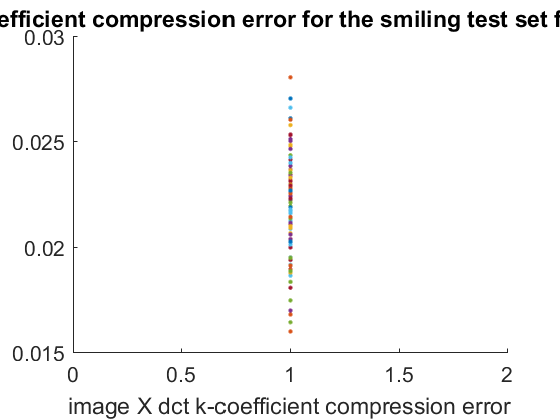

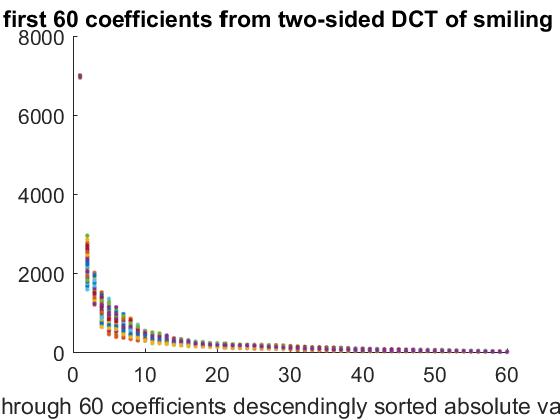

average_dct_error =

    0.0218


In [18]:
%  plot of the descendingly sorted absolute values of the first 60 coefficient values from the two-sided DCT of  X  (in Matlab: dct2(X))
figure
hold on;
for i = 1:samplesize
   TwoSidedDCTofX = dct2(F_Smiling(i, :));
   SortedAbsoluteValuesOfDCTCoefficients = sort(abs(TwoSidedDCTofX(1:60)), 'descend');
   plot( SortedAbsoluteValuesOfDCTCoefficients(1:60), '.')
end
title('first 60 coefficients from two-sided DCT of smiling X')
xlabel('1 through 60 coefficients descendingly sorted absolute values')
hold off;

%  plot of the two-sided DCT's k-coefficient compression error for the smiling test set  (for k <= 60)
total_dct_error = 0;
figure
hold on;
for i = 1:100
    TwoSidedDCTofX = dct2(smiling_testing(i, :));
    k_dct_error = sum(abs(TwoSidedDCTofX(61:100))) / sum(abs(TwoSidedDCTofX));
    total_dct_error = total_dct_error + k_dct_error;
    plot(k_dct_error, '.')
end
title('dct k-coefficient compression error for the smiling test set for k <= 60')
xlabel('image X dct k-coefficient compression error')
hold off;

% Compute the average dct compression error for k <= 60
average_dct_error = total_dct_error / 100



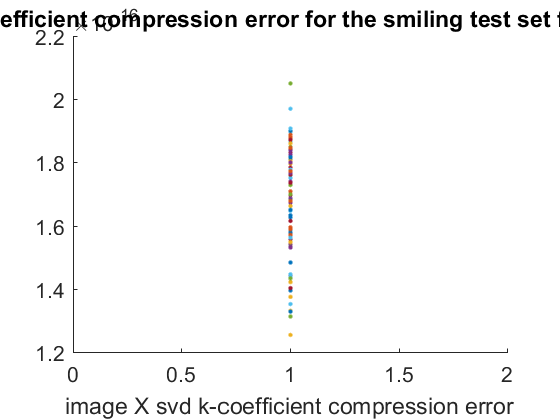

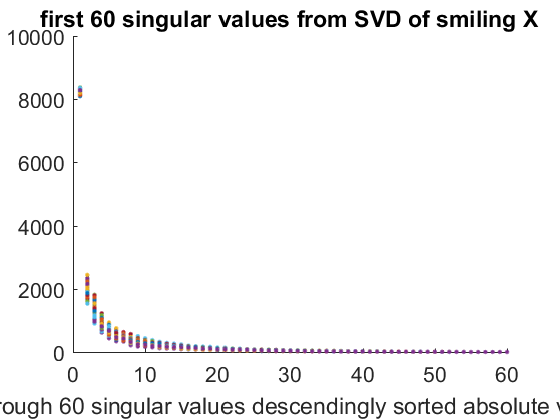

average_svd_error =

   1.6768e-16


In [19]:
%  plot of the descendingly sorted absolute values of the first 60 singular values from the SVD of  X
figure
hold on;
for i = 1:samplesize
    [U,S,V] = svd(reshape(F_Smiling(i, :),[64,64]));
    sigma = diag(S);
   plot(abs(sigma(1:60)), '.')
end
title('first 60 singular values from SVD of smiling X')
xlabel('1 through 60 singular values descendingly sorted absolute values')
hold off;

%  plot of the svd rank-k compression error for the smiling test set  (for k <= 60)
total_svd_error = 0;
figure
hold on;
for i = 1:100
    [U,S,V] = svd(reshape(smiling_testing(i, :), [64,64]));
    sigma = diag(S);
    k_svd_error = sum(abs(sigma(61:64))) / sum(abs(sigma));
    total_svd_error = total_svd_error + k_svd_error;
    plot(k_svd_error, '.')
end
title('svd k-coefficient compression error for the smiling test set for k <= 60')
xlabel('image X svd k-coefficient compression error')
hold off;

% Compute the average fft compression error for k <= 60
average_svd_error = total_svd_error / 100

In [20]:
% Which of the 4 compression schemes has lowest average compression error? SVD has the lowest average compression error
% Rank by average compression error (smallest to largest average error): 
average_svd_error
average_dct_error
average_fft_error
average_eigenface_error

average_svd_error =

   1.6768e-16


average_dct_error =

    0.0218


average_fft_error =

    0.0416


average_eigenface_error =

    0.2054
